In [1]:
import zmq
import msgpack
import time
import numpy as np
import sys
import json
from pprint import pprint
import ceo

In [2]:
port = "5556"
config = json.loads(open('simulation.json').read())
pprint(config)
pprint(config["optical path"][0]["ubuntu_cuda70"]["path"])

context = zmq.Context()
socket = context.socket(zmq.REP)
socket.bind("tcp://*:%s" % port)

message = socket.recv()
print "Received request: ", message

optical_path = config["optical path"][0][message]["path"]
pprint(optical_path)

socket.send_json(optical_path)

for k in range(len(optical_path)):
    message = socket.recv()
    print "Received request: ", message
    time.sleep (1)  
    socket.send_json(json.loads(open(message+'.json').read())) 

{u'git tag': 0.1,
 u'name': u'Simple Imager',
 u'optical path': [{u'ubuntu_cuda70': {u'GPU ID': 0,
                                       u'label': u'imagine',
                                       u'path': {u'GMT_MX': u'GMT',
                                                 u'Imaging': u'imager',
                                                 u'Source': u'star'}}}]}
{u'GMT_MX': u'GMT', u'Imaging': u'imager', u'Source': u'star'}
Received request:  ubuntu_cuda70
{u'GMT_MX': u'GMT', u'Imaging': u'imager', u'Source': u'star'}
Received request:  star
Received request:  GMT
Received request:  imager


# DATA CLIENT

In [3]:
data_port = "5557"
data_context = zmq.Context()
print "Connecting to server..."
data_socket = data_context.socket(zmq.REQ)
data_socket.connect ("tcp://localhost:%s" % data_port)


Connecting to server...


In [14]:
ea = np.zeros((7,3))
ea[2,1] = ceo.constants.ARCSEC2RAD

In [15]:
print "Sending request ", "wavefront","..."
data_socket.send ("wavefront")

Sending request  wavefront ...


In [17]:
msg = data_socket.recv()
if msg=="euler angles":
    print "Received request: ", msg
    time.sleep (1) 
    msg = msgpack.packb(ea.tolist())
    data_socket.send(msg)
else:
    data = np.array( msgpack.unpackb(msg,use_list=False) )

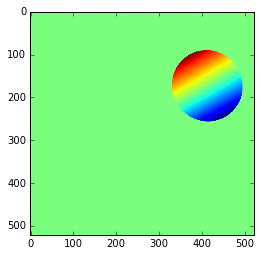

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(data)

In [13]:
msg=='euler angles'


False

In [ ]:
messa